## Exploratory Data Analysis on the Zindi training set
Before jumping into applying any machine learning models, it's wise to conduct a bit of EDA to get a better sense of the data. 

Given that our dataset has only a few columns, and the most important feature of our dataset (the text) is unstructured data, the scope of our EDA is fairly limited (clustering techniques and PCA will be difficult to apply in this case without first applying NLP techniques to transform the unstructured text into word-embeddings or vectors).

For the purposes of my project, I was primarily interested to see the diversity among the labels and their distribution. Questions I wanted to answer included: "is one or some label(s) assigned more often than others?", "Does each sample have a comparable # of assigned labels?". It's helpful to know this information beforehand since while I planned to collapse the various "sub labels" of SDG goal#3 to just one label: "health-related" or not in my final project, skewed assignment of labels and their distribution could have a result on the final model. For example, if the majority of samples in this dataset came from news articles, the text could be expected to be longer which could affect how the "health related" label is assigned by a model in the future. Or if the majority of the samples were assigned to a particular indicator within SDG#3 such as  "rate of AIDS among at risk populations", I could expect the model might learn more about recognizing text dealing with AIDS cases/reports than just "health-related" in general.


In [1]:
#for vectorized operations
import numpy as np
#for dataset visualization and aggregation/organization
import pandas as pd
#for the NLP feature selectors, tfidf
import nltk
#for creating arrays to be used in csr sparse matrices
import scipy
from sklearn import * #imports all sklearn models
#for data cleaning and removing the html tags
import re
#for plotting and data visualization
import matplotlib.pyplot as plt

In [2]:
#I have also found this issue when reading a large csv file with the default egine. If I use engine='python' then it works fine.
train_CLEAN = pd.read_csv('train_CLEAN.csv', encoding='utf-8', engine='python')

In [3]:
train_CLEAN.shape

(2995, 30)

In [4]:
train_CLEAN.columns

Index(['Unique ID', 'Type', 'Text', '3.1.1', '3.1.2', '3.2.1', '3.2.2',
       '3.3.1', '3.3.2', '3.3.3', '3.3.4', '3.3.5', '3.4.1', '3.4.2', '3.5.1',
       '3.5.2', '3.6.1', '3.7.1', '3.7.2', '3.8.1', '3.8.2', '3.9.1', '3.9.2',
       '3.9.3', '3.a.1', '3.b.1', '3.b.2', '3.b.3', '3.c.1', '3.d.1'],
      dtype='object')

In [5]:
## there is one more thing we need to do before use which is to remove any None values
corpus = train_CLEAN['Text'].values

#creates a list of where there any "None" values have been replaced with empty string
def none_begone(x):
    if x != None:
        return x
    else:
        return ''

replacenone_corpus = [none_begone(x) for x in corpus]

#for later use when we need the text information along with the labels
#I do not know why this shortens the length from 3003 to 2998, although the values at a given
#index appear to be the same
df_replacenone_corpus = pd.DataFrame(replacenone_corpus )

In [6]:
len(replacenone_corpus)

2995

In [7]:
len(train_CLEAN['Text']), train_CLEAN['Text'].head(5)

(2995, 0    centers biomedical research excellence cobre p...
 1    research regenerative medicine h2strongintrodu...
 2    catholic health association india chai pthe ca...
 3             quality improvement initiatives diabetes
 4    provision thalassemia drugs disposables h2stro...
 Name: Text, dtype: object)

In [8]:
len(df_replacenone_corpus ), df_replacenone_corpus .head(5)

(2995,                                                    0
 0  centers biomedical research excellence cobre p...
 1  research regenerative medicine h2strongintrodu...
 2  catholic health association india chai pthe ca...
 3           quality improvement initiatives diabetes
 4  provision thalassemia drugs disposables h2stro...)

## Question 1, what is the distribution of label indicators?

In [9]:
#plt.figure(figsize=(20,20))

#taking only the label columns
bar_data = train_CLEAN.iloc[:,3:30]
bar_data_display = bar_data.sum()

In [10]:
bar_data_display.index

Index(['3.1.1', '3.1.2', '3.2.1', '3.2.2', '3.3.1', '3.3.2', '3.3.3', '3.3.4',
       '3.3.5', '3.4.1', '3.4.2', '3.5.1', '3.5.2', '3.6.1', '3.7.1', '3.7.2',
       '3.8.1', '3.8.2', '3.9.1', '3.9.2', '3.9.3', '3.a.1', '3.b.1', '3.b.2',
       '3.b.3', '3.c.1', '3.d.1'],
      dtype='object')

Text(0.5, 1.0, 'Label/Indicator vs frequency of occurance')

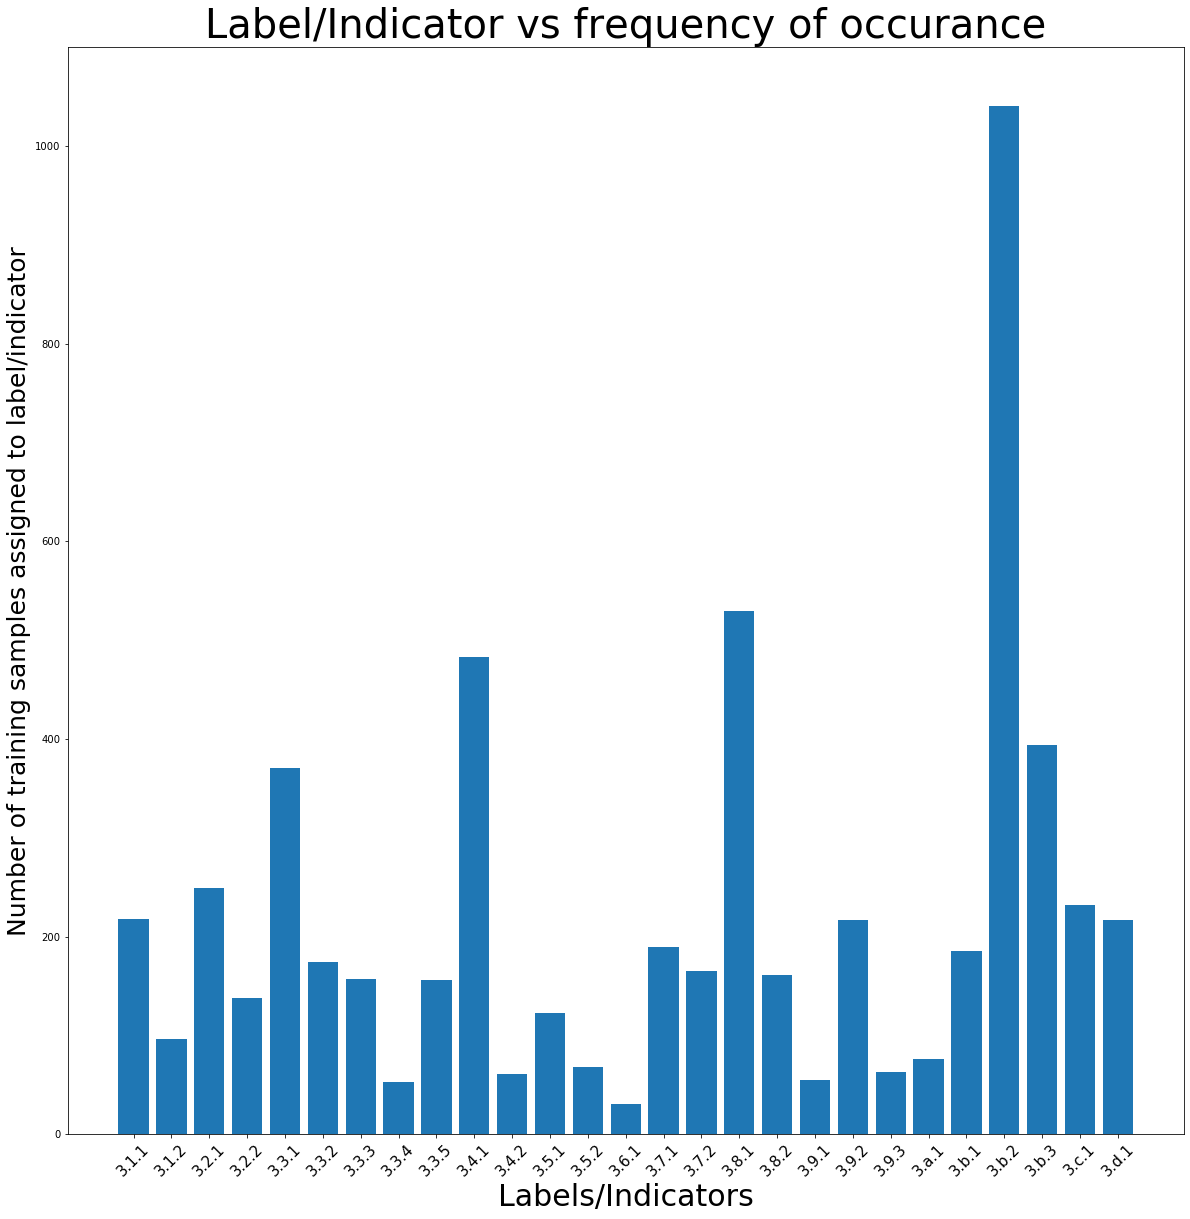

In [18]:
plt.figure(figsize=(20,20))
plt.bar(x=bar_data_display.index,height=bar_data_display)
plt.ylim(0,1100)
plt.ylabel("Number of training samples assigned to label/indicator", fontsize=25)
plt.xlabel("Labels/Indicators", fontsize=30)
plt.xticks(fontsize=15, rotation=45)
plt.title("Label/Indicator vs frequency of occurance", fontsize=40)

## label 3.b.2 is by far the label most often assigned
3.b.2 = Total net official development assistance to medical research and basic health sectors

This indicator has to deal with funding for medical research and health services. It makes sense that this label may be often assigned since funding may often be mentioned alongside

## Question 2, what is the distribution of # of labels?

In [14]:
a = np.array(train_CLEAN.iloc[0, 3:30])
a.sum()

2.0

In [15]:
#collects the number of labels associated with each training example
number_of_labels = []
for row in range(len(train_CLEAN)):
    series_sum = train_CLEAN.iloc[row, 3:30].sum()
    number_of_labels.append(series_sum)

In [16]:
number_of_labels

[2.0,
 1.0,
 4.0,
 1.0,
 2.0,
 2.0,
 3.0,
 2.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 4.0,
 1.0,
 2.0,
 2.0,
 3.0,
 3.0,
 2.0,
 1.0,
 1.0,
 5.0,
 1.0,
 3.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 3.0,
 2.0,
 3.0,
 4.0,
 5.0,
 2.0,
 1.0,
 1.0,
 3.0,
 2.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 4.0,
 2.0,
 3.0,
 1.0,
 6.0,
 1.0,
 3.0,
 3.0,
 1.0,
 1.0,
 1.0,
 2.0,
 5.0,
 1.0,
 2.0,
 1.0,
 1.0,
 6.0,
 2.0,
 1.0,
 1.0,
 3.0,
 3.0,
 1.0,
 2.0,
 4.0,
 1.0,
 1.0,
 2.0,
 5.0,
 1.0,
 1.0,
 3.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 5.0,
 1.0,
 2.0,
 1.0,
 4.0,
 5.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 2.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 2.0,
 2.0,
 2.0,
 2.0,
 4.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 3.0,
 1.0,
 2.0,
 1.0,
 1.0,
 4.0,
 4.0,
 4.0,
 1.0,
 4.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 2.0,
 5.0,
 5.0,
 1.0,
 2.0,
 2.0,
 1.0,
 1.0,
 1.0,
 2.0,
 3.0,
 2.0,
 2.0,
 1.0,
 2.0,
 1.0,
 2.0,
 3.0,
 2.0,
 1.0,
 2.0,
 3.0,
 4.0,
 2.0

Text(0.5, 1.0, 'Number of labels associated with each training example')

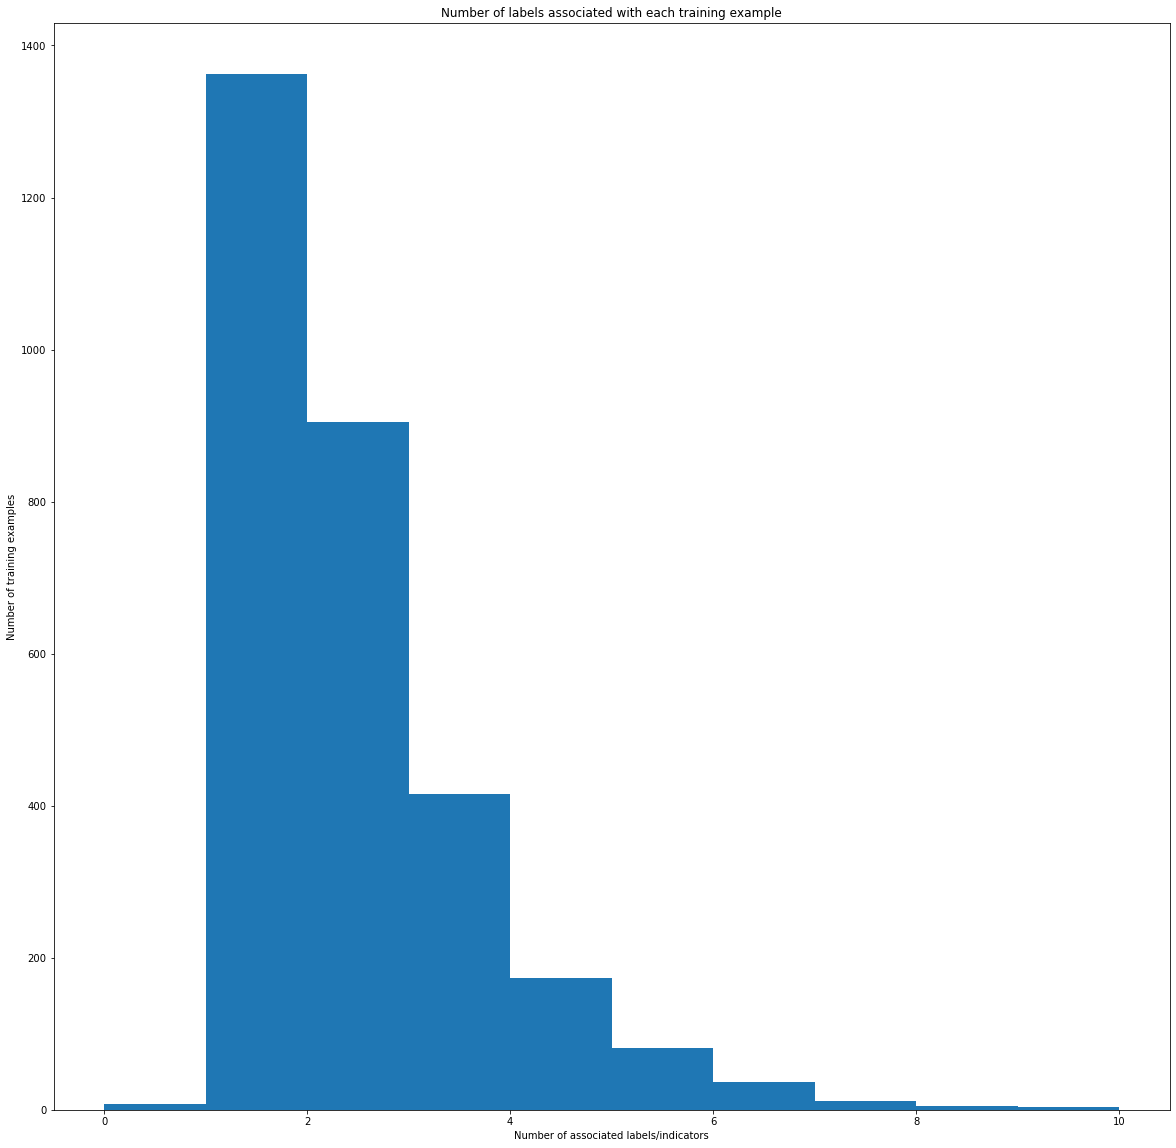

In [17]:
plt.figure(figsize=(20,20))
plt.hist(number_of_labels)
plt.ylabel("Number of training examples")
plt.xlabel("Number of associated labels/indicators")
plt.title("Number of labels associated with each training example")